Working on Purchase Data:

In [28]:
# import necessary libraries
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [29]:
# Reading data into dataframes
df = pd.read_excel("C:\\Users\\cvenk\\Downloads\\Lab Session1 Data.xlsx" , sheet_name = 'Purchase data', usecols = 'B:E')

In [30]:
A_columns = ["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]
matrix_A = df[A_columns].values

C_columns = ["Payment (Rs)"]
matrix_C = df[C_columns].values

print(df)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0           20             6                 2           386
1           16             3                 6           289
2           27             6                 2           393
3           19             1                 2           110
4           24             4                 2           280
5           22             1                 5           167
6           15             4                 2           271
7           18             4                 2           274
8           21             1                 4           148
9           16             2                 4           198


Q1.
What is the dimensionality of the vector space for this data?
How many vectors exist in this vector space?
What is the rank of Matrix A?
Using Pseudo-Inverse find the cost of each product available for sale.

In [31]:
# Dimensionality of A
dimensionality_of_A = matrix_A.shape[1]
print(f"Dimensionality of the data is: {dimensionality_of_A}")

# Number of vectors in vector space of A
num_vecs_A = matrix_A.shape[0]
print(f"Number of vectors in the vector space: {num_vecs_A}")

Dimensionality of the data is: 3
Number of vectors in the vector space: 10


In [32]:
#  Rank of the matrix A
rank_A = np.linalg.matrix_rank(matrix_A)
print(f"Rank of the matrix A: {rank_A}")

Rank of the matrix A: 3


Q2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.
inv_A is a pseudoinverse
A * X = C
X = inv_A * C

In [33]:
inv_A = np.linalg.pinv(matrix_A)
print(inv_A)

[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


In [34]:
# Model Vector X
X = np.dot(inv_A, matrix_C)
print(X)

[[ 1.]
 [55.]
 [18.]]


Q3. Marking all vectors with Payments more than 200 as RICH, and others as POOR

In [35]:
df['Customer_Type'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
print(df)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Customer_Type
0           20             6                 2           386          RICH
1           16             3                 6           289          RICH
2           27             6                 2           393          RICH
3           19             1                 2           110          POOR
4           24             4                 2           280          RICH
5           22             1                 5           167          POOR
6           15             4                 2           271          RICH
7           18             4                 2           274          RICH
8           21             1                 4           148          POOR
9           16             2                 4           198          POOR


In [36]:
def categorize_cust(purchase_data):
  predicted_pay = np.dot(purchase_data, X)
  if(predicted_pay > 200):
    return "RICH"
  else:
    return "POOR"

test = [20, 6, 2] # 18 Candies, 2 Mangoes, and 3 Milk packets
print(categorize_cust(test))

RICH


Q4. IRCTC Stock Price

In [37]:
df2 = pd.read_excel("C:\\Users\\cvenk\\Downloads\\Lab Session1 Data.xlsx", sheet_name = 'IRCTC Stock Price', usecols= 'B:I')
mean_stock_price = statistics.mean(df2['Price'])
var_stock_price = statistics.variance(df2['Price'])
print(f"The mean and variance of the stock price is: {mean_stock_price}, {var_stock_price}")
print(df2)

The mean and variance of the stock price is: 1560.663453815261, 58732.365352539186
    Month  Day    Price     Open     High      Low   Volume    Chg%
0     Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M  0.0020
1     Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K  0.0043
2     Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K -0.0020
3     Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K -0.0026
4     Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K -0.0023
..    ...  ...      ...      ...      ...      ...      ...     ...
244   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K -0.0024
245   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K -0.0031
246   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K -0.0051
247   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M  0.0362
248   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K  0.0032

[249 rows x 8 columns]


Price data for all the Wednesdays

In [38]:
wed_data = df2[df2['Day'] == 'Wed']
sample_mean_wed = statistics.mean(wed_data['Price'])
print(f"Comparing mean price and wednesday mean price: {mean_stock_price}, {sample_mean_wed}")

Comparing mean price and wednesday mean price: 1560.663453815261, 1550.706


Price data for month of April

In [39]:
april_data = df2[df2['Month'] == 'Apr']
sample_mean_april = statistics.mean(april_data['Price'])
print(f"Comparing Mean price and April mean price: {mean_stock_price}, {sample_mean_april}")

Comparing Mean price and April mean price: 1560.663453815261, 1698.9526315789474


Probability of making a loss

In [40]:
loss_probability = df2['Chg%'].apply(lambda x: 1 if x < 0 else 0).mean()
print(f"Probability of making a loss: {loss_probability}")

Probability of making a loss: 0.4979919678714859


Calculate the probability of making a profit on Wednesday.

Probability of making a profit on Wednesday: 0.42
Conditional probability of making profit on Wednesday: 0.42


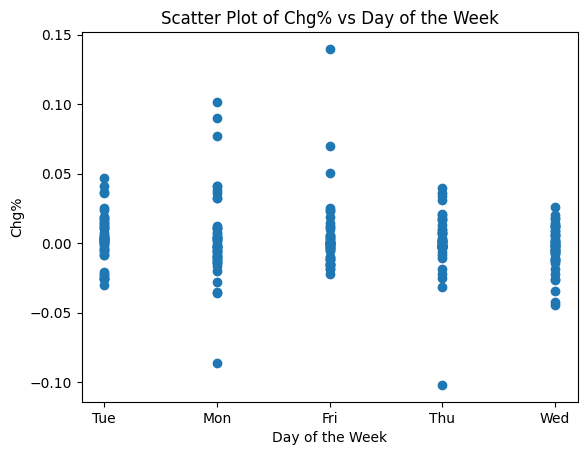

In [41]:
profit_wed_prob = len(wed_data[wed_data['Chg%'] > 0]) / len(wed_data)
print(f"Probability of making a profit on Wednesday: {profit_wed_prob}")

cond_profit_prob = len(wed_data[wed_data['Chg%'] > 0]) / len(wed_data)
print(f"Conditional probability of making profit on Wednesday: {cond_profit_prob}")

plt.scatter(df2['Day'], df2['Chg%'])
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Scatter Plot of Chg% vs Day of the Week')
plt.show()